In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from random import randrange
from PIL import Image
import os
import random
from sklearn.decomposition import TruncatedSVD #importing just to do truncatedSVD for me, I didn't have the time(and energy :) ) to implement by myself.

In [82]:
#the number of classes
no_of_classes = 6

In [83]:
##k-Cross_validation_split:
def cross_validation_split(dataset,k):
    k_folds = list()
    copy_data = list(dataset)
    fold_size = int(len(dataset)/k)
    
    for i in range(k):
        fold = list()
        for j in range(fold_size):
            fold.append(copy_data.pop(randrange(len(copy_data))))
        k_folds.append(fold)
    return k_folds 

In [84]:
def one_hot_encoding(y, no_of_classes):
    y_o_h = np.zeros((1, no_of_classes))
    #print(y)
    y_o_h[0,int(y)] = 1
    return np.array(y_o_h)

In [85]:
#define sigmoid function:
def softmax(z):
    z-= np.max(z)
    activ = np.exp(z)/np.sum(np.exp(z), axis = 1, keepdims = True)
    return activ

In [98]:
def gradient_cross_entropy_loss_function(w,b,X, Y):
    
    m = X.shape[0]
    softmax_activ = softmax(np.dot(X,w) + b)
    loss = -(1/m)*np.sum(Y*np.log(softmax_activ + 1e-6))
    dw = np.dot(X.T, (softmax_activ - Y))/m
    assert(dw.shape == w.shape)
    db = np.sum(softmax_activ - Y , axis = 0, keepdims = True)/m
    assert(db.shape == b.shape)
    
    gradient = {"dw" : dw, "db" : db}
    return gradient, loss

In [114]:
#optimize:
from tqdm import tqdm
def mini_batch_optimization(w,b,X,Y, epoches, lr_alpha, batch_size):
    m = X.shape[0]
    costs = []
    for i in tqdm(range(epoches)):
        batch = np.random.choice(range(m), batch_size)
        X_batch = X[batch,:]
        Y_batch = Y[batch,:]
        gradients, cost = gradient_cross_entropy_loss_function(w,b,X_batch,Y_batch)
        
        dw = gradients["dw"]
        db = gradients["db"]
        
        w = w - lr_alpha*dw
        b = b - lr_alpha*db
        if i % 100 == 0:
            costs.append(cost)
        params = {"w" : w, "b" : b}
    return params, costs

In [90]:
def prediction(w,b,X):
    m = X.shape[0] #no of data points
    Y_prediction = np.zeros((m,no_of_classes))#prediciton will be one hot encoding for each data
    w = w.reshape(X.shape[1],no_of_classes)
    b = b.reshape(1,no_of_classes)
    soft = softmax(np.dot( X,w) + b)
    #print(logit)
    for i in range(soft.shape[0]):
        index = np.argmax(soft[i,:].reshape((1, no_of_classes)))
        Y_prediction[i, index] = 1
    assert(Y_prediction.shape ==(m,no_of_classes))
    return Y_prediction

In [ ]:
x = np.array([[1,3,55,23,2],[1,2,44,55,2]])
for i in range(x.shape[1]):
    print(np.argmax(x[:, i].reshape(1,2)))

In [14]:
import os
IMAGE_PATH = './Medical_MNIST'
print(os.path.abspath(IMAGE_PATH))
n_components = 20

C:\Users\rockt\Assignment1_git\ELL409_Assignment1\Medical_MNIST


In [15]:
#data_loader
#!DEL *.npz
from tqdm import tqdm
split = 0.7 #using 70:30 split, random each time
def data_loader():
    X = []
    Y = []
    X_test = []
    Y_test = []
    
    i = 0
    for folder in os.listdir(os.path.abspath(IMAGE_PATH)):
        IMAGE_DIR = os.path.join(IMAGE_PATH, folder)
        print("Reading" + IMAGE_DIR)
        files = os.listdir(IMAGE_DIR)
        random.shuffle(files)
        j=0
        for file in tqdm(files):
            if j < int(len(files)*split):
                X.append((np.asarray(Image.open(os.path.join(IMAGE_DIR, file)))).reshape(-1))
                Y.append(i)
            else:
                X_test.append((np.asarray(Image.open(os.path.join(IMAGE_DIR, file)))).reshape(-1))
                Y_test.append(i)
            j += 1
        
        i += 1
    print('Completed Loading Data. Saving as np file so that can directy load array nexttime')
    np.savez('q3data.npz', X = np.array(X), Y = np.array(Y), X_test=X_test, Y_test = Y_test)
    return np.array(X), np.array(Y), np.array(X_test), np.array(Y_test)

if 'q3data.npz' in os.listdir('./'):
    zfile = np.load('q3data.npz')
    X = zfile['X']
    Y = zfile['Y']
    X_test = zfile['X_test']
    Y_test = zfile['Y_test']
else:
    X, Y, X_test, Y_test = data_loader()

In [16]:
#Lets try to do PCA on the input images??
h, w = 64, 64
'''
def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data
    #credits to https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184 for helping me write PCA
    #and saving me a few hours.
'''
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
'''
n_components = 50
P, C, M, X_centered=pca(X[:1000], n_pc=n_components)
#P->lower dimensional version of X, C-> Eigen vectors with largest eigen values, M->mean image (used in reconstruction)
eigenscans = C.reshape((n_components, h, w))
eigenscan_titles = ["eigenscan %d" % i for i in range(eigenscans.shape[0])]
plot_portraits(eigenscans, eigenscan_titles, h, w, 4, 4) 
'''

'\nn_components = 50\nP, C, M, X_centered=pca(X[:1000], n_pc=n_components)\n#P->lower dimensional version of X, C-> Eigen vectors with largest eigen values, M->mean image (used in reconstruction)\neigenscans = C.reshape((n_components, h, w))\neigenscan_titles = ["eigenscan %d" % i for i in range(eigenscans.shape[0])]\nplot_portraits(eigenscans, eigenscan_titles, h, w, 4, 4) \n'

In [17]:
X_samples = list()
Y_samples = list()
X_samples.append(list(X))
Y_samples.append(list(Y))
X_samples.append(list(X_test))
Y_samples.append(list(Y_test))
X_samples = sum(X_samples, [])
Y_samples = sum(Y_samples, [])
X_samples = np.array(X_samples)
Y_samples = np.array(Y_samples)

In [18]:
def fastpca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    svd = TruncatedSVD(n_components=n_pc, n_iter=7, random_state=42)
    svd.fit(X)
    #U, S, V = np.linalg.svd(centered_data)
    components = svd.components_
    #projected = U[:,:n_pc]*S[:n_pc]
    projected = svd.transform(X)
    return projected, components, mean, centered_data

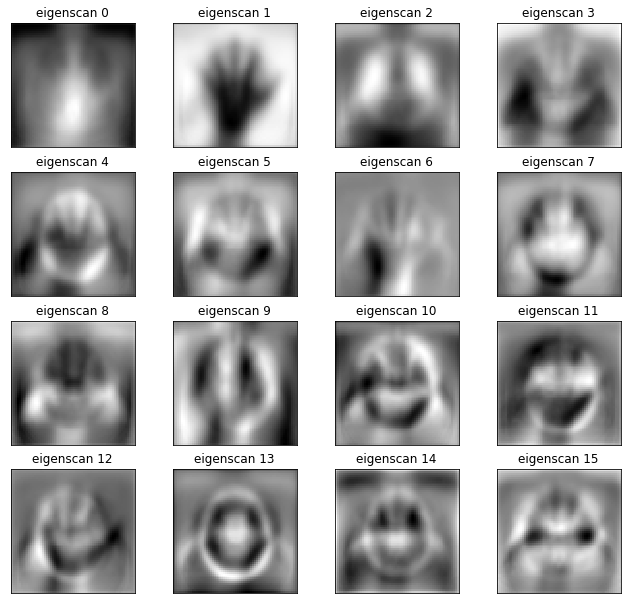

In [19]:
X_red, C, M, X_centered=fastpca(X_samples, n_pc=n_components)
#X_red->lower dimensional version of X, C-> Eigen vectors with largest eigen values, M->mean image (used in reconstruction)
eigenscans = C.reshape((n_components, h, w))
eigenscan_titles = ["eigenscan %d" % i for i in range(eigenscans.shape[0])]
plot_portraits(eigenscans, eigenscan_titles, h, w, 4, 4) 

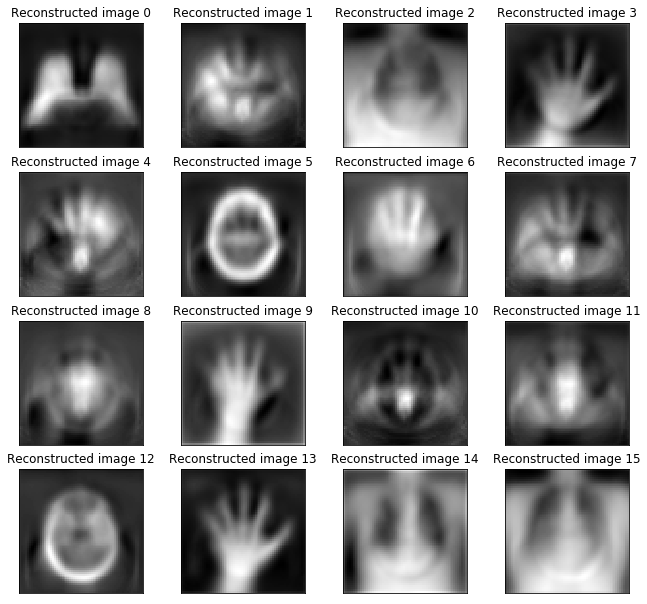

In [20]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
arr = np.random.choice(X.shape[0], 16)
recovered_images=[reconstruction(X_centered, C, M, h, w, i) for i in arr]
plot_portraits(recovered_images, [f"Reconstructed image {i}" for i in range(len(recovered_images))], h, w, n_row=4, n_col=4)

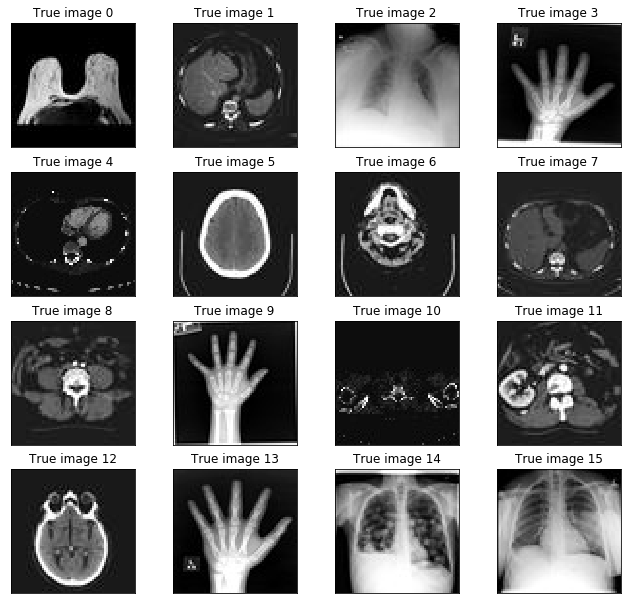

In [21]:
true_images = [X[i].reshape(h, w) for i in arr]
plot_portraits(true_images, [f"True image {i}" for i in range(len(recovered_images))], h, w, n_row=4, n_col=4)

In [22]:
Y_samples = Y_samples.reshape((58954,1))

In [23]:
X_final = np.append(X_red, Y_samples, axis = 1)
X_final.shape

(58954, 21)

In [24]:
no_of_classes = 6

In [52]:
int(Y_samples[58931,:])

5

In [37]:
type(Y_samples)
Y

numpy.ndarray

In [65]:
k_folds = cross_validation_split(X_final, 5)


In [70]:
X_test = k_folds[0]
X_test = np.array(X_test)
print(X_test.shape)

(11790, 21)


In [69]:
X_train = list(k_folds)
#print(ind)
del X_train[0]
X_train = sum(X_train, [])
X_train = np.array(X_train)

In [74]:
X_train_f = X_train[:, :20]
X_test_f = X_test[:,:20]
Y_train_f = X_train[:,20].reshape(X_train.shape[0],1)
Y_test_f = X_test[:,20].reshape(X_test.shape[0],1)

In [76]:
Y_tr = np.zeros((Y_train_f.shape[0], no_of_classes))
for i in range(Y_train_f.shape[0]):
    Y_tr[i,:] = one_hot_encoding(int(Y_train_f[i,:]), no_of_classes)

In [77]:
Y_ts = np.zeros((Y_test_f.shape[0], no_of_classes))
for i in range(Y_test_f.shape[0]):
    Y_ts[i,:] = one_hot_encoding(int(Y_test_f[i,:]), no_of_classes)

In [121]:
w = np.zeros(( X_train_f.shape[1], no_of_classes))
b = np.zeros((1, no_of_classes))

In [106]:
parameters, costs = mini_batch_optimization(w, b, X_train_f, Y_tr, 10000, 0.0000005,1000)

100%|██████████| 10000/10000 [04:25<00:00, 37.61it/s]


array([1.79175347, 0.15113347, 0.17039531, 0.12058524, 0.13030403,
       0.1183173 , 0.0905454 , 0.12127021, 0.11111277, 0.14599253])

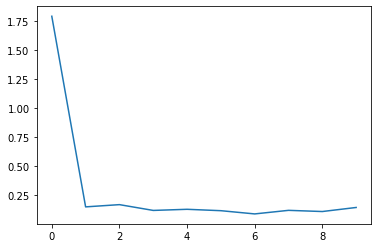

In [107]:
costs = np.squeeze(costs)
plt.plot(costs)
costs

In [120]:
def model(w,b ,X_train, Y_train, X_test, Y_test, epoches = 10000, learning_rate = 0.0005, batch_size = 1000):
    parameters, costs = mini_batch_optimization(w, b, X_train, Y_train, epoches, learning_rate,batch_size)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = prediction(w, b, X_test)
    Y_prediction_train = prediction(w, b, X_train)
    print(Y_prediction_train.shape)
    print(Y_prediction_test.shape)
    tr_m = Y_train.shape[0]
    ts_m = Y_test.shape[0]
    print("train accuracy: {} %".format(100 -(1/(2*tr_m))*np.sum(np.abs(Y_prediction_train[:,:] - Y_train[:,:])) * 100))
    print("test accuracy: {} %".format(100 - (1/(2*ts_m))*np.sum(np.abs(Y_prediction_test[:,:] - Y_test[:,:])) * 100))
    
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": epoches}
    
    return d

In [122]:
d = model(w, b, X_train_f, Y_tr,X_test_f, Y_ts, 20000, 0.0000005,1000)



  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 1/20000 [00:02<11:33:46,  2.08s/it]

  0%|          | 10/20000 [00:02<8:06:40,  1.46s/it]

  0%|          | 19/20000 [00:02<5:41:39,  1.03s/it]

  0%|          | 29/20000 [00:02<4:00:04,  1.39it/s]

  0%|          | 39/20000 [00:02<2:49:03,  1.97it/s]

  0%|          | 48/20000 [00:02<1:59:24,  2.78it/s]

  0%|          | 58/20000 [00:02<1:24:35,  3.93it/s]

  0%|          | 68/20000 [00:02<1:00:11,  5.52it/s]

  0%|          | 78/20000 [00:02<43:07,  7.70it/s]  

  0%|          | 88/20000 [00:03<31:14, 10.62it/s]

  0%|          | 100/20000 [00:03<22:41, 14.62it/s]

  1%|          | 110/20000 [00:03<16:54, 19.61it/s]

  1%|          | 122/20000 [00:03<12:44, 26.02it/s]

  1%|          | 133/20000 [00:03<09:51, 33.57it/s]

  1%|          | 144/20000 [00:03<07:50, 42.23it/s]

  1%|          | 155/20000 [00:03<06:35, 50.19it/s]

  1%|          | 165/20000 [00:03<05:37, 58.73it/s]

  1%|          | 175/20000 [00:03<04:59, 66.26

  8%|▊         | 1568/20000 [00:16<03:10, 96.54it/s] 

  8%|▊         | 1578/20000 [00:17<03:10, 96.78it/s]

  8%|▊         | 1589/20000 [00:17<03:06, 98.59it/s]

  8%|▊         | 1599/20000 [00:17<03:11, 95.96it/s]

  8%|▊         | 1610/20000 [00:17<03:06, 98.51it/s]

  8%|▊         | 1620/20000 [00:17<03:12, 95.63it/s]

  8%|▊         | 1630/20000 [00:17<03:17, 92.93it/s]

  8%|▊         | 1641/20000 [00:17<03:09, 97.02it/s]

  8%|▊         | 1652/20000 [00:17<03:06, 98.49it/s]

  8%|▊         | 1664/20000 [00:17<02:58, 102.96it/s]

  8%|▊         | 1676/20000 [00:17<02:52, 106.19it/s]

  8%|▊         | 1688/20000 [00:18<02:49, 108.29it/s]

  8%|▊         | 1700/20000 [00:18<02:46, 109.80it/s]

  9%|▊         | 1712/20000 [00:18<02:45, 110.28it/s]

  9%|▊         | 1724/20000 [00:18<02:55, 104.02it/s]

  9%|▊         | 1735/20000 [00:18<02:57, 102.86it/s]

  9%|▊         | 1746/20000 [00:18<02:57, 102.64it/s]

  9%|▉         | 1757/20000 [00:18<03:00, 101.08it/s]

  9%|▉         | 1

 16%|█▌        | 3150/20000 [00:31<02:44, 102.13it/s]

 16%|█▌        | 3164/20000 [00:31<02:33, 109.66it/s]

 16%|█▌        | 3178/20000 [00:31<02:23, 117.07it/s]

 16%|█▌        | 3190/20000 [00:31<02:33, 109.64it/s]

 16%|█▌        | 3204/20000 [00:32<02:25, 115.61it/s]

 16%|█▌        | 3217/20000 [00:32<02:21, 118.36it/s]

 16%|█▌        | 3230/20000 [00:32<02:28, 112.57it/s]

 16%|█▌        | 3244/20000 [00:32<02:22, 117.58it/s]

 16%|█▋        | 3257/20000 [00:32<02:20, 118.81it/s]

 16%|█▋        | 3270/20000 [00:32<02:21, 118.40it/s]

 16%|█▋        | 3282/20000 [00:32<02:28, 112.31it/s]

 16%|█▋        | 3295/20000 [00:32<02:24, 115.92it/s]

 17%|█▋        | 3307/20000 [00:32<02:34, 107.76it/s]

 17%|█▋        | 3318/20000 [00:33<02:34, 108.19it/s]

 17%|█▋        | 3329/20000 [00:33<02:39, 104.78it/s]

 17%|█▋        | 3340/20000 [00:33<02:44, 101.11it/s]

 17%|█▋        | 3351/20000 [00:33<02:41, 103.41it/s]

 17%|█▋        | 3362/20000 [00:33<02:48, 98.60it/s] 

 17%|█▋   

 24%|██▎       | 4715/20000 [00:46<02:21, 108.25it/s]

 24%|██▎       | 4726/20000 [00:46<02:25, 104.82it/s]

 24%|██▎       | 4738/20000 [00:46<02:21, 108.15it/s]

 24%|██▎       | 4749/20000 [00:46<02:23, 106.27it/s]

 24%|██▍       | 4760/20000 [00:46<02:29, 101.79it/s]

 24%|██▍       | 4772/20000 [00:46<02:26, 104.23it/s]

 24%|██▍       | 4783/20000 [00:47<02:25, 104.47it/s]

 24%|██▍       | 4795/20000 [00:47<02:21, 107.31it/s]

 24%|██▍       | 4806/20000 [00:47<02:21, 107.56it/s]

 24%|██▍       | 4817/20000 [00:47<02:21, 107.10it/s]

 24%|██▍       | 4828/20000 [00:47<02:20, 107.72it/s]

 24%|██▍       | 4841/20000 [00:47<02:14, 112.46it/s]

 24%|██▍       | 4853/20000 [00:47<02:23, 105.37it/s]

 24%|██▍       | 4864/20000 [00:47<02:23, 105.57it/s]

 24%|██▍       | 4876/20000 [00:47<02:18, 109.01it/s]

 24%|██▍       | 4888/20000 [00:48<02:17, 110.02it/s]

 24%|██▍       | 4900/20000 [00:48<02:16, 110.74it/s]

 25%|██▍       | 4912/20000 [00:48<02:23, 105.40it/s]

 25%|██▍  

 31%|███▏      | 6275/20000 [01:01<02:17, 100.02it/s]

 31%|███▏      | 6287/20000 [01:01<02:13, 102.39it/s]

 31%|███▏      | 6298/20000 [01:01<02:17, 99.54it/s] 

 32%|███▏      | 6310/20000 [01:01<02:10, 104.71it/s]

 32%|███▏      | 6323/20000 [01:01<02:04, 109.59it/s]

 32%|███▏      | 6337/20000 [01:01<01:57, 116.43it/s]

 32%|███▏      | 6349/20000 [01:01<02:03, 110.45it/s]

 32%|███▏      | 6361/20000 [01:01<02:01, 112.60it/s]

 32%|███▏      | 6373/20000 [01:02<01:59, 114.16it/s]

 32%|███▏      | 6387/20000 [01:02<01:54, 119.09it/s]

 32%|███▏      | 6400/20000 [01:02<01:53, 119.56it/s]

 32%|███▏      | 6413/20000 [01:02<01:53, 120.23it/s]

 32%|███▏      | 6426/20000 [01:02<01:59, 113.75it/s]

 32%|███▏      | 6438/20000 [01:02<01:57, 115.31it/s]

 32%|███▏      | 6451/20000 [01:02<01:55, 117.51it/s]

 32%|███▏      | 6463/20000 [01:02<01:55, 117.64it/s]

 32%|███▏      | 6475/20000 [01:02<01:56, 115.70it/s]

 32%|███▏      | 6487/20000 [01:03<02:02, 110.59it/s]

 32%|███▏ 

 39%|███▉      | 7844/20000 [01:15<01:59, 102.08it/s]

 39%|███▉      | 7858/20000 [01:16<01:50, 109.62it/s]

 39%|███▉      | 7870/20000 [01:16<01:48, 111.37it/s]

 39%|███▉      | 7882/20000 [01:16<01:50, 109.56it/s]

 39%|███▉      | 7894/20000 [01:16<01:52, 107.74it/s]

 40%|███▉      | 7906/20000 [01:16<01:50, 109.41it/s]

 40%|███▉      | 7918/20000 [01:16<01:57, 102.42it/s]

 40%|███▉      | 7930/20000 [01:16<01:54, 105.23it/s]

 40%|███▉      | 7941/20000 [01:16<01:55, 104.28it/s]

 40%|███▉      | 7952/20000 [01:17<02:00, 100.24it/s]

 40%|███▉      | 7963/20000 [01:17<02:02, 98.63it/s] 

 40%|███▉      | 7973/20000 [01:17<02:05, 95.98it/s]

 40%|███▉      | 7985/20000 [01:17<01:58, 101.41it/s]

 40%|███▉      | 7996/20000 [01:17<01:58, 101.07it/s]

 40%|████      | 8008/20000 [01:17<01:54, 104.78it/s]

 40%|████      | 8022/20000 [01:17<01:46, 112.86it/s]

 40%|████      | 8036/20000 [01:17<01:40, 118.68it/s]

 40%|████      | 8049/20000 [01:17<01:46, 112.49it/s]

 40%|████  

 47%|████▋     | 9420/20000 [01:30<01:55, 91.76it/s]

 47%|████▋     | 9431/20000 [01:30<01:49, 96.13it/s]

 47%|████▋     | 9441/20000 [01:31<01:49, 96.77it/s]

 47%|████▋     | 9452/20000 [01:31<01:45, 100.19it/s]

 47%|████▋     | 9463/20000 [01:31<01:48, 97.04it/s] 

 47%|████▋     | 9473/20000 [01:31<01:50, 95.47it/s]

 47%|████▋     | 9483/20000 [01:31<01:48, 96.58it/s]

 47%|████▋     | 9493/20000 [01:31<01:49, 95.97it/s]

 48%|████▊     | 9503/20000 [01:31<01:50, 95.01it/s]

 48%|████▊     | 9515/20000 [01:31<01:44, 100.40it/s]

 48%|████▊     | 9526/20000 [01:31<01:46, 98.74it/s] 

 48%|████▊     | 9536/20000 [01:31<01:47, 96.89it/s]

 48%|████▊     | 9547/20000 [01:32<01:45, 99.20it/s]

 48%|████▊     | 9558/20000 [01:32<01:43, 100.88it/s]

 48%|████▊     | 9569/20000 [01:32<01:46, 98.28it/s] 

 48%|████▊     | 9580/20000 [01:32<01:45, 98.87it/s]

 48%|████▊     | 9591/20000 [01:32<01:43, 100.09it/s]

 48%|████▊     | 9603/20000 [01:32<01:41, 102.45it/s]

 48%|████▊     | 961

 54%|█████▍    | 10894/20000 [01:45<01:28, 102.94it/s]

 55%|█████▍    | 10906/20000 [01:45<01:26, 105.62it/s]

 55%|█████▍    | 10918/20000 [01:45<01:23, 108.74it/s]

 55%|█████▍    | 10930/20000 [01:45<01:23, 108.35it/s]

 55%|█████▍    | 10941/20000 [01:45<01:25, 106.08it/s]

 55%|█████▍    | 10952/20000 [01:45<01:31, 98.42it/s] 

 55%|█████▍    | 10962/20000 [01:46<01:34, 95.84it/s]

 55%|█████▍    | 10973/20000 [01:46<01:31, 98.17it/s]

 55%|█████▍    | 10983/20000 [01:46<01:34, 95.40it/s]

 55%|█████▍    | 10996/20000 [01:46<01:27, 102.77it/s]

 55%|█████▌    | 11007/20000 [01:46<01:28, 102.00it/s]

 55%|█████▌    | 11020/20000 [01:46<01:22, 108.58it/s]

 55%|█████▌    | 11032/20000 [01:46<01:22, 108.52it/s]

 55%|█████▌    | 11044/20000 [01:46<01:21, 109.97it/s]

 55%|█████▌    | 11056/20000 [01:46<01:24, 105.46it/s]

 55%|█████▌    | 11068/20000 [01:47<01:21, 109.22it/s]

 55%|█████▌    | 11081/20000 [01:47<01:18, 113.31it/s]

 55%|█████▌    | 11093/20000 [01:47<01:19, 111.79it

 62%|██████▏   | 12404/20000 [02:00<01:11, 105.68it/s]

 62%|██████▏   | 12416/20000 [02:00<01:10, 107.92it/s]

 62%|██████▏   | 12427/20000 [02:00<01:10, 106.73it/s]

 62%|██████▏   | 12440/20000 [02:00<01:07, 111.42it/s]

 62%|██████▏   | 12452/20000 [02:00<01:10, 106.39it/s]

 62%|██████▏   | 12463/20000 [02:00<01:11, 104.77it/s]

 62%|██████▏   | 12474/20000 [02:00<01:12, 103.67it/s]

 62%|██████▏   | 12485/20000 [02:00<01:17, 96.94it/s] 

 62%|██████▏   | 12495/20000 [02:00<01:18, 95.13it/s]

 63%|██████▎   | 12507/20000 [02:01<01:14, 101.25it/s]

 63%|██████▎   | 12518/20000 [02:01<01:14, 99.86it/s] 

 63%|██████▎   | 12529/20000 [02:01<01:13, 101.36it/s]

 63%|██████▎   | 12540/20000 [02:01<01:12, 103.59it/s]

 63%|██████▎   | 12551/20000 [02:01<01:14, 100.33it/s]

 63%|██████▎   | 12564/20000 [02:01<01:09, 106.72it/s]

 63%|██████▎   | 12575/20000 [02:01<01:09, 106.21it/s]

 63%|██████▎   | 12586/20000 [02:01<01:10, 105.25it/s]

 63%|██████▎   | 12597/20000 [02:01<01:12, 102.55

 69%|██████▉   | 13883/20000 [02:14<01:01, 98.73it/s] 

 69%|██████▉   | 13893/20000 [02:14<01:03, 95.50it/s]

 70%|██████▉   | 13903/20000 [02:14<01:06, 91.82it/s]

 70%|██████▉   | 13913/20000 [02:14<01:06, 91.62it/s]

 70%|██████▉   | 13925/20000 [02:15<01:02, 97.48it/s]

 70%|██████▉   | 13935/20000 [02:15<01:03, 95.22it/s]

 70%|██████▉   | 13947/20000 [02:15<01:00, 100.56it/s]

 70%|██████▉   | 13958/20000 [02:15<01:02, 96.01it/s] 

 70%|██████▉   | 13968/20000 [02:15<01:02, 95.86it/s]

 70%|██████▉   | 13979/20000 [02:15<01:01, 98.18it/s]

 70%|██████▉   | 13989/20000 [02:15<01:01, 97.93it/s]

 70%|███████   | 14000/20000 [02:15<01:00, 99.96it/s]

 70%|███████   | 14011/20000 [02:15<00:59, 100.60it/s]

 70%|███████   | 14022/20000 [02:16<00:59, 100.22it/s]

 70%|███████   | 14034/20000 [02:16<00:56, 104.68it/s]

 70%|███████   | 14045/20000 [02:16<00:57, 104.19it/s]

 70%|███████   | 14057/20000 [02:16<00:55, 107.11it/s]

 70%|███████   | 14068/20000 [02:16<00:56, 105.56it/s]

 

 76%|███████▋  | 15282/20000 [02:29<00:50, 93.35it/s]

 76%|███████▋  | 15292/20000 [02:29<00:52, 89.94it/s]

 77%|███████▋  | 15302/20000 [02:29<00:53, 87.46it/s]

 77%|███████▋  | 15313/20000 [02:29<00:50, 92.09it/s]

 77%|███████▋  | 15323/20000 [02:29<00:49, 94.13it/s]

 77%|███████▋  | 15333/20000 [02:29<00:51, 90.93it/s]

 77%|███████▋  | 15343/20000 [02:29<00:50, 93.03it/s]

 77%|███████▋  | 15353/20000 [02:30<00:51, 90.70it/s]

 77%|███████▋  | 15364/20000 [02:30<00:49, 94.09it/s]

 77%|███████▋  | 15374/20000 [02:30<00:49, 93.45it/s]

 77%|███████▋  | 15384/20000 [02:30<00:51, 88.80it/s]

 77%|███████▋  | 15394/20000 [02:30<00:51, 88.78it/s]

 77%|███████▋  | 15403/20000 [02:30<00:53, 86.40it/s]

 77%|███████▋  | 15414/20000 [02:30<00:49, 91.94it/s]

 77%|███████▋  | 15424/20000 [02:30<00:50, 89.97it/s]

 77%|███████▋  | 15434/20000 [02:30<00:53, 84.61it/s]

 77%|███████▋  | 15444/20000 [02:31<00:52, 86.69it/s]

 77%|███████▋  | 15453/20000 [02:31<00:52, 87.22it/s]

 77%|█████

 84%|████████▎ | 16725/20000 [02:43<00:33, 96.68it/s]

 84%|████████▎ | 16735/20000 [02:44<00:35, 92.07it/s]

 84%|████████▎ | 16745/20000 [02:44<00:35, 92.30it/s]

 84%|████████▍ | 16755/20000 [02:44<00:34, 93.76it/s]

 84%|████████▍ | 16765/20000 [02:44<00:34, 94.27it/s]

 84%|████████▍ | 16776/20000 [02:44<00:33, 95.99it/s]

 84%|████████▍ | 16787/20000 [02:44<00:32, 98.81it/s]

 84%|████████▍ | 16797/20000 [02:44<00:32, 98.36it/s]

 84%|████████▍ | 16807/20000 [02:44<00:33, 93.92it/s]

 84%|████████▍ | 16817/20000 [02:44<00:34, 91.29it/s]

 84%|████████▍ | 16827/20000 [02:45<00:35, 88.83it/s]

 84%|████████▍ | 16838/20000 [02:45<00:33, 94.10it/s]

 84%|████████▍ | 16849/20000 [02:45<00:32, 97.39it/s]

 84%|████████▍ | 16859/20000 [02:45<00:33, 94.62it/s]

 84%|████████▍ | 16869/20000 [02:45<00:33, 94.61it/s]

 84%|████████▍ | 16879/20000 [02:45<00:34, 91.25it/s]

 84%|████████▍ | 16890/20000 [02:45<00:32, 94.50it/s]

 85%|████████▍ | 16901/20000 [02:45<00:31, 97.69it/s]

 85%|█████

 91%|█████████ | 18156/20000 [02:58<00:22, 83.45it/s]

 91%|█████████ | 18165/20000 [02:58<00:22, 82.56it/s]

 91%|█████████ | 18174/20000 [02:58<00:22, 80.21it/s]

 91%|█████████ | 18183/20000 [02:59<00:23, 78.64it/s]

 91%|█████████ | 18192/20000 [02:59<00:22, 81.13it/s]

 91%|█████████ | 18202/20000 [02:59<00:21, 84.53it/s]

 91%|█████████ | 18212/20000 [02:59<00:20, 86.19it/s]

 91%|█████████ | 18221/20000 [02:59<00:20, 86.86it/s]

 91%|█████████ | 18231/20000 [02:59<00:19, 88.81it/s]

 91%|█████████ | 18243/20000 [02:59<00:18, 95.69it/s]

 91%|█████████▏| 18253/20000 [02:59<00:19, 87.38it/s]

 91%|█████████▏| 18263/20000 [02:59<00:20, 85.98it/s]

 91%|█████████▏| 18272/20000 [03:00<00:19, 86.96it/s]

 91%|█████████▏| 18281/20000 [03:00<00:20, 85.18it/s]

 91%|█████████▏| 18290/20000 [03:00<00:20, 84.21it/s]

 91%|█████████▏| 18299/20000 [03:00<00:20, 83.32it/s]

 92%|█████████▏| 18309/20000 [03:00<00:19, 85.74it/s]

 92%|█████████▏| 18318/20000 [03:00<00:19, 84.60it/s]

 92%|█████

 98%|█████████▊| 19550/20000 [03:13<00:04, 95.09it/s]

 98%|█████████▊| 19560/20000 [03:13<00:04, 92.83it/s]

 98%|█████████▊| 19570/20000 [03:13<00:04, 93.35it/s]

 98%|█████████▊| 19580/20000 [03:13<00:04, 91.16it/s]

 98%|█████████▊| 19592/20000 [03:13<00:04, 98.18it/s]

 98%|█████████▊| 19603/20000 [03:14<00:04, 98.93it/s]

 98%|█████████▊| 19616/20000 [03:14<00:03, 105.35it/s]

 98%|█████████▊| 19627/20000 [03:14<00:03, 102.04it/s]

 98%|█████████▊| 19638/20000 [03:14<00:03, 99.31it/s] 

 98%|█████████▊| 19649/20000 [03:14<00:03, 97.22it/s]

 98%|█████████▊| 19659/20000 [03:14<00:03, 93.45it/s]

 98%|█████████▊| 19669/20000 [03:14<00:03, 85.62it/s]

 98%|█████████▊| 19678/20000 [03:14<00:03, 84.51it/s]

 98%|█████████▊| 19687/20000 [03:14<00:03, 85.91it/s]

 98%|█████████▊| 19696/20000 [03:15<00:03, 86.41it/s]

 99%|█████████▊| 19706/20000 [03:15<00:03, 88.94it/s]

 99%|█████████▊| 19715/20000 [03:15<00:03, 88.81it/s]

 99%|█████████▊| 19725/20000 [03:15<00:02, 91.71it/s]

 99%|██

(47160, 6)
(11790, 6)
train accuracy: 97.24130619168787 %
test accuracy: 97.10771840542833 %


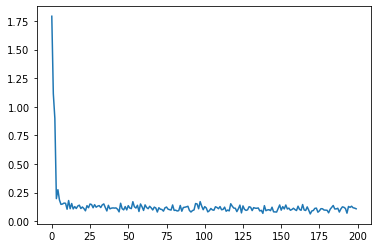

In [123]:
costs = np.squeeze(d['costs'])
plt.plot(costs)